In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("soil.xlsx")
df.isna().sum()

Sr. No.               9
Report Number         8
Farmer Name           8
Village               8
Variety               8
Plot No/\nGat No     37
Area (Acres)        503
Sample Date           8
Report Date           8
pH                    8
EC                    8
CaCo3                 8
OC                    8
N                     8
NH4-N                 8
P                     8
K                     8
Ca                    8
Mg                    8
S                     8
Fe                    8
Mn                    8
Zn                    8
Cu                    8
Na                    8
B                     8
HCO3                  8
Cl                    8
dtype: int64

In [3]:
df['Area (Acres)'].fillna(0,inplace=True)
df.dropna(inplace=True)

In [8]:
df.to_excel("soil2.xlsx",index=False)

In [9]:
v=df['Village'].unique()
v

array(['Pimpalas Ramche', 'Oney', 'Kasbe Sukene', 'Sukene', 'Khedgaon',
       'Gondegaon', 'Tisgaon', 'Talegaon', 'Valkhed', 'Pade',
       'Lakhamapur', 'Materwadi', 'Varkheda', 'Deherewadi',
       'Umrale Khurd', 'Pimpalgaon Dhum', 'Pimpalgaon Ketaki', 'Dhakambe',
       'Vanarwadi', 'Palkhed', 'Ugaon', 'Pimpalnare', 'Vadner Bhairav',
       'Sogras', 'Shirsane', 'Bhilwad (Devla)', 'Kochargaon',
       'Karvandevadi', 'Vilwandi', 'Kundewadi', 'Nandurdi', 'Dugaon',
       'Mahadeopur', 'Jalalpur', 'Makhamalabad', 'Chandsi', 'Makhmalabad',
       'Mukhed', 'Sakore Mig', 'Pachore', 'Umbarkhed', 'Ambe Dindori',
       'Dongargaon', 'Dharangaon veer', 'Dharangaon    ', 'Bharvas',
       'Nandgaon', 'Chikani', 'Govardhan', 'Savargoan', 'Nalwadi',
       'Konambe', 'Harsule', 'Sonambe', 'Gangavhre', 'Pimpalgaon Nipani',
       'Bhendali', 'Shinde', 'Rajapur', 'Musalgaon', 'Pimpalgaon Khamb',
       'Lohshingave', 'Jakhori', 'Talegaon/Anjneri', 'Manur', 'Laxmanpur',
       'Mirgaon', 'Shah

In [9]:
df['Variety'].unique()

array(['  RIES', '  SBL', '  SYR', '  ZIN', '  CBL', '  TEMP', '  Muscat',
       '  ZIN/CBL MIX', '  ZIN/TEMP', '  CAB', '  CHA', '  GRE', '  VIO',
       '  SYR + GRE', '  SYR + ZIN', '  CHA + SYR', '  GRE + TEMP',
       '  CBL + SYR', '  RIES+CBL+CBL+VIO', '  RIES + CBL', '  SYR + CBL',
       '  UB', 'CAB', 'CBL', '  CAB + CBL', 'SYR + SYR', 'SYR',
       'SYR+SYR+CAB', 'CAB + VIO', 'SBL + VIO', 'CAB + SYR',
       '  TEMP + CBL', '  CBL+ TEMP', '  SYR + CAB', '  SYR + SBL',
       '  TEMP + ZIN', '  SBL + TEMP', '  PNN', '  CBL + ZIN',
       '  CHA + VIO', '  CBL + CHA', '  PNN + Muscat', '  CAB + CHY'],
      dtype=object)

In [10]:
primary=["N","P","K","Fe", "Mn", "Zn", "Cu", "B", "Mo", "Cl","Ni"]
secondary=["pH","EC","OC","CaCo3"]

In [11]:
p=[]
for i in primary[0:5]:
    p.append(round(df[df['Village']=="Pimpalas Ramche"][i].mean(),2))

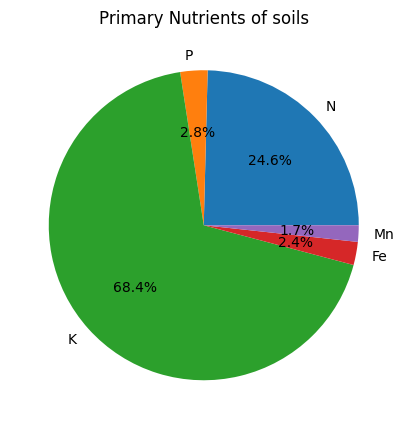

In [12]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
cars = primary[0:5]

data = p

# Creating plot
fig = plt.figure(figsize =(5, 7))
plt.pie(data, labels = cars,autopct='%1.1f%%')
plt.title('Primary Nutrients of soils')
# show plot
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
final=[]
for i in v:
    col=list(df.columns)
    cor=[]
    for p in primary:
        if p in col:
            f=[]
            for s in secondary:
                r=df.loc[df.Village==i]
                #r=r.iloc[::,9:]
                c=r[p].corr(r[s]).round(2)
                f.append(c)
            f.insert(0,p)
            f.insert(0,i)
            cor.append(f)
    final.append(cor)
secondary.insert(0,"Villages")
secondary.insert(1,"Chemical properties Available nutrients")

    #cor.insert(0,i)   
    #print(cor)
    #plt.figure(figsize=(10,10))
    #plot=sns.heatmap(r.corr().round(2),annot=True)
#final

C:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [14]:
fd=[]
for k in final:
    dp=pd.DataFrame(k)
    dp.columns=secondary
    fd.append(dp)
cd=pd.concat(fd)
cd
#cd.to_excel("Correlation_of_soil_properties.xlsx",index=False)
#cd['Chemical properties Available nutrients'=='N']]]

,Villages,Chemical properties Available nutrients,pH,EC,OC,CaCo3
0,Pimpalas Ramche,N,-0.19,-0.35,0.87,-0.28
1,Pimpalas Ramche,P,-0.45,0.14,0.67,0.39
2,Pimpalas Ramche,K,0.82,0.03,0.18,0.15
3,Pimpalas Ramche,Fe,0.62,-0.47,-0.24,-0.20
4,Pimpalas Ramche,Mn,-0.29,-0.52,0.21,-0.69
...,...,...,...,...,...,...
4,Talwade,Mn,-1.00,-1.00,1.00,-1.00
5,Talwade,Zn,-1.00,-1.00,1.00,-1.00
6,Talwade,Cu,-1.00,-1.00,1.00,-1.00
7,Talwade,B,1.00,1.00,-1.00,1.00


In [15]:

cd['pH'].fillna(cd['pH'].mean(),inplace=True)
cd['EC'].fillna(cd['EC'].mean(),inplace=True)
cd['OC'].fillna(cd['OC'].mean(),inplace=True)
cd['CaCo3'].fillna(cd['CaCo3'].mean(),inplace=True)
cd.isna().sum()
cd

,Villages,Chemical properties Available nutrients,pH,EC,OC,CaCo3
0,Pimpalas Ramche,N,-0.19,-0.35,0.87,-0.28
1,Pimpalas Ramche,P,-0.45,0.14,0.67,0.39
2,Pimpalas Ramche,K,0.82,0.03,0.18,0.15
3,Pimpalas Ramche,Fe,0.62,-0.47,-0.24,-0.20
4,Pimpalas Ramche,Mn,-0.29,-0.52,0.21,-0.69
...,...,...,...,...,...,...
4,Talwade,Mn,-1.00,-1.00,1.00,-1.00
5,Talwade,Zn,-1.00,-1.00,1.00,-1.00
6,Talwade,Cu,-1.00,-1.00,1.00,-1.00
7,Talwade,B,1.00,1.00,-1.00,1.00


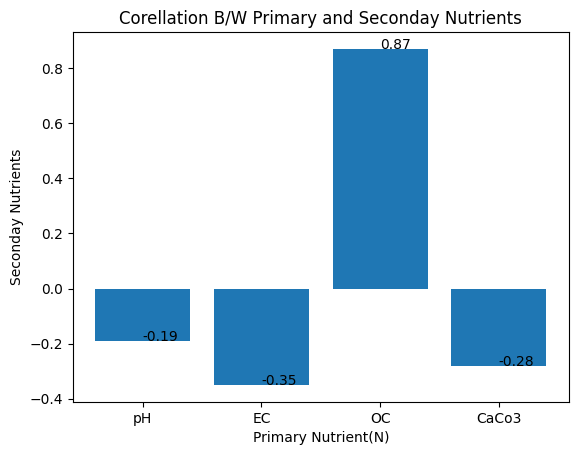

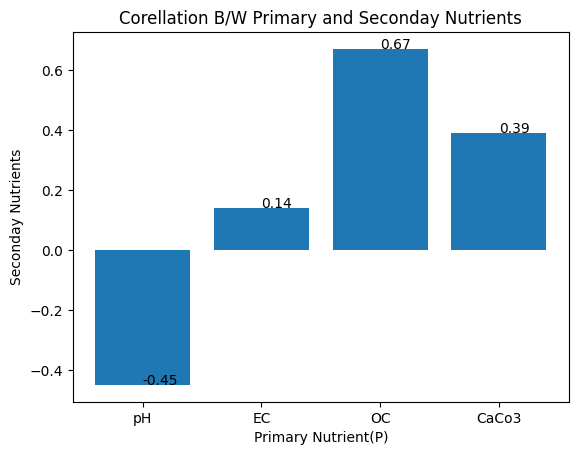

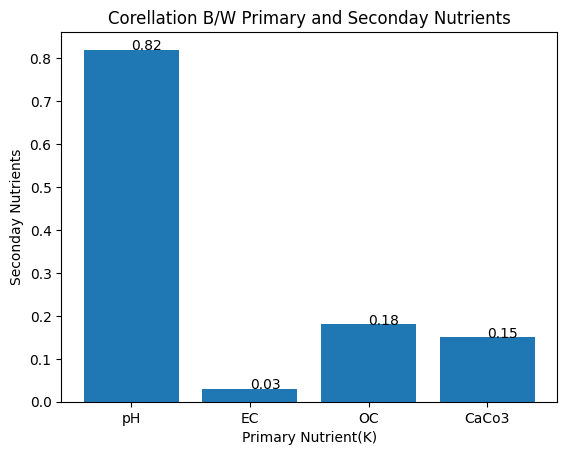

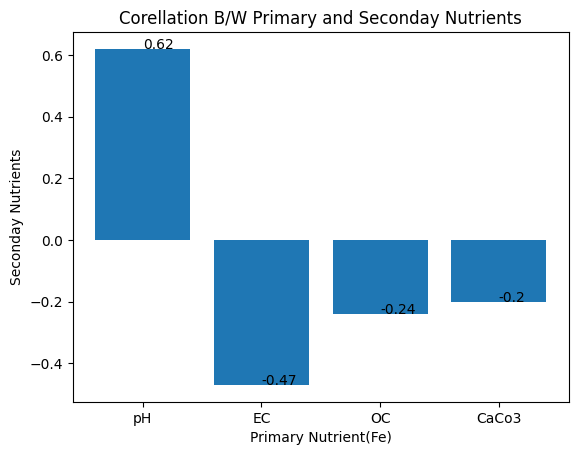

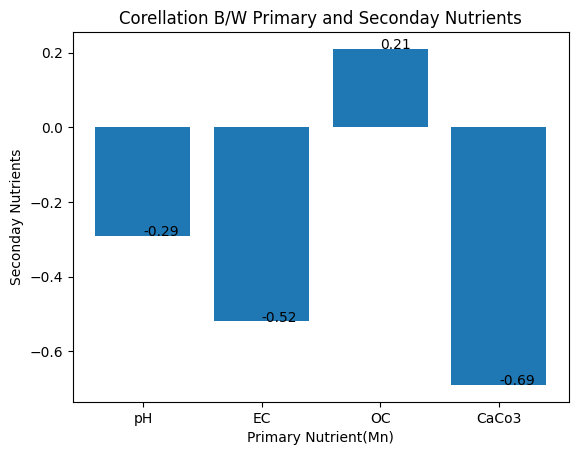

In [64]:
for i in range(5):
    cor=cd.iloc[i,2:].values.tolist()
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])

    if __name__ == '__main__':
    # creating data on which bar chart will be plot
        x = ["pH", "EC", "OC","CaCo3"]
        y = cor

        # making the bar chart on the data
        plt.bar(x, y)

        # calling the function to add value labels
        addlabels(x, y)

        # giving title to the plot
        plt.title("Corellation B/W Primary and Seconday Nutrients")

        # giving X and Y labels
        plt.xlabel(f"Primary Nutrient({primary[i]})")
        plt.ylabel("Seconday Nutrients")

        # visualizing the plot
        plt.show()

array([<AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>,
       <AxesSubplot: ylabel='Frequency'>], dtype=object)

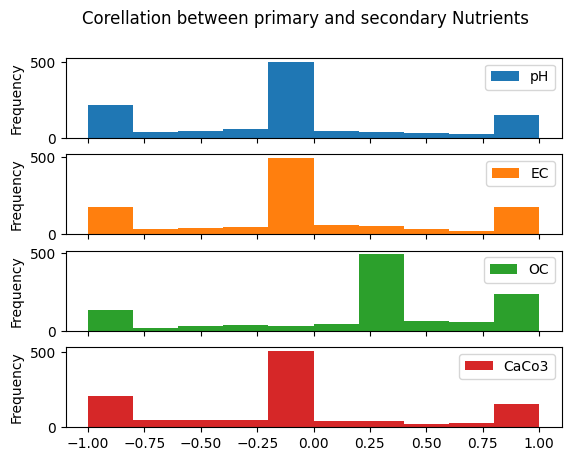

In [16]:
cd.plot(kind='hist', title='Corellation between primary and secondary Nutrients',subplots=True)
#c.set_xlabel("Secondary Nutrients")
#c.set_ylabel("Primary Nutrients")

# Categorization of soil parameters and nutrients

In [17]:
n=df.iloc[::,9:].columns
cpn=[]
for vl in v:
    high=[]
    low=[]
    medium=[]

    for i in n:
        r=df.loc[df.Village==vl]
        per_h=r[i].sum()/len(r)
        high.append(round(r[i].sum()/len(r),2))
        low.append(round(per_h-1.0,2))
        medium.append(str(round(per_h-1.0,2))+"-"+str(round(r[i].sum()/len(r),2)))
    cs=pd.DataFrame({"Village":vl,"Parameter":n,"LOW (Acidic)":low,"MEDIUM (Neutral)":medium,"HIGH (Alkaline)":high})
    cpn.append(cs)
pn=pd.concat(cpn)
pn

,Village,Parameter,LOW (Acidic),MEDIUM (Neutral),HIGH (Alkaline)
0,Pimpalas Ramche,pH,7.12,7.12-8.12,8.12
1,Pimpalas Ramche,EC,-0.74,-0.74-0.26,0.26
2,Pimpalas Ramche,CaCo3,7.83,7.83-8.83,8.83
3,Pimpalas Ramche,OC,0.12,0.12-1.12,1.12
4,Pimpalas Ramche,N,180.83,180.83-181.83,181.83
...,...,...,...,...,...
14,Talwade,Cu,15.04,15.04-16.04,16.04
15,Talwade,Na,119.00,119.0-120.0,120.00
16,Talwade,B,-0.70,-0.7-0.3,0.30
17,Talwade,HCO3,181.00,181.0-182.0,182.00


# Chemical properties of soils i

In [18]:
cdf=[]
for cv in v:
    pr=['pH','EC','CaCo3','OC']
    m=df.loc[df.Village==cv]
    cp=[]
    for p in pr:
        mn=round(m[p].mean(),2)
        r=str(m[p].min())+"-"+str(m[p].max())
        cp.append([cv,p,r,mn])
    d2=pd.DataFrame(cp,columns=['Village','Chemical Property','Range',"Mean"])
    cdf.append(d2)
cs2=pd.concat(cdf)
cs2

,Village,Chemical Property,Range,Mean
0,Pimpalas Ramche,pH,7.91-8.47,8.12
1,Pimpalas Ramche,EC,0.119-0.478,0.26
2,Pimpalas Ramche,CaCo3,3.0-15.0,8.83
3,Pimpalas Ramche,OC,0.91-1.49,1.12
0,Oney,pH,7.91-8.42,8.16
...,...,...,...,...
3,Someshwar,OC,1.02-1.02,1.02
0,Talwade,pH,5.81-6.6,6.20
1,Talwade,EC,0.204-0.215,0.21
2,Talwade,CaCo3,1.0-2.0,1.50


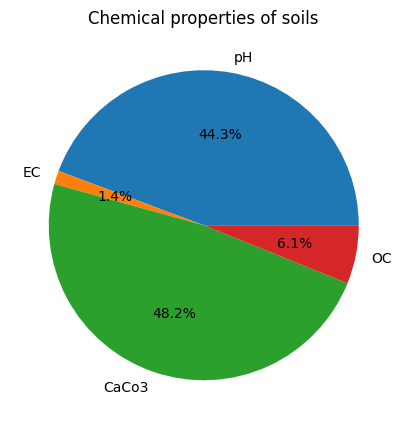

In [19]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
cars = cs2.iloc[0:4,1].values.tolist()

data = cs2.iloc[0:4,3].values.tolist()

# Creating plot
fig = plt.figure(figsize =(5, 7))
plt.pie(data, labels = cars,autopct='%1.1f%%')
plt.title('Chemical properties of soils')
# show plot
plt.show()


In [20]:
cdf2=[]
for cv in v:
    pr1=['S','Zn','Fe','Mn','B']
    m1=df.loc[df.Village==cv]
    cp=[]
    for p in pr1:
        mn=round(m1[p].mean(),2)
        r=str(m1[p].min())+"-"+str(m1[p].max())
        cp.append([cv,p,r,mn])
    d2=pd.DataFrame(cp,columns=['Village','Chemical Property','Range',"Mean"])
    cdf2.append(d2)
cs2=pd.concat(cdf2)
cs2

,Village,Chemical Property,Range,Mean
0,Pimpalas Ramche,S,41.0-74.0,54.00
1,Pimpalas Ramche,Zn,2.01-3.96,3.23
2,Pimpalas Ramche,Fe,4.56-41.87,17.83
3,Pimpalas Ramche,Mn,5.91-25.4,12.69
4,Pimpalas Ramche,B,0.25-0.67,0.46
...,...,...,...,...
0,Talwade,S,21.0-22.0,21.50
1,Talwade,Zn,4.81-9.34,7.07
2,Talwade,Fe,44.5-54.16,49.33
3,Talwade,Mn,24.77-26.2,25.48


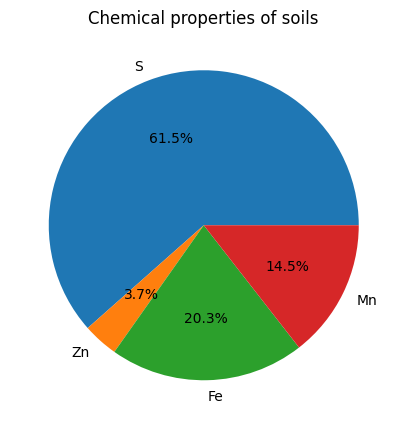

In [21]:
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
cars = cs2.iloc[0:4,1].values.tolist()

data = cs2.iloc[0:4,3].values.tolist()

# Creating plot
fig = plt.figure(figsize =(5, 7))
plt.pie(data, labels = cars,autopct='%1.1f%%')
plt.title('Chemical properties of soils')
# show plot
plt.show()


# Percent samples deficient for available sulphur and micronutrients in soils

In [22]:
cdf2=[]
for cv in v:
    pr1=['S','Zn','Fe','Mn','B']
    m1=df.loc[df.Village==cv]
    cp=[]
    for p in pr1:
        mn=round(sum(m1[p])/len(df)*100,2)
        cp.append([cv,p,mn])
    d2=pd.DataFrame(cp,columns=['Village','Chemical Property',"Percentage"])
    cdf2.append(d2)
cs2=pd.concat(cdf2)
cs2

,Village,Chemical Property,Percentage
0,Pimpalas Ramche,S,63.41
1,Pimpalas Ramche,Zn,3.79
2,Pimpalas Ramche,Fe,20.94
3,Pimpalas Ramche,Mn,14.90
4,Pimpalas Ramche,B,0.54
...,...,...,...
0,Talwade,S,8.41
1,Talwade,Zn,2.77
2,Talwade,Fe,19.31
3,Talwade,Mn,9.97


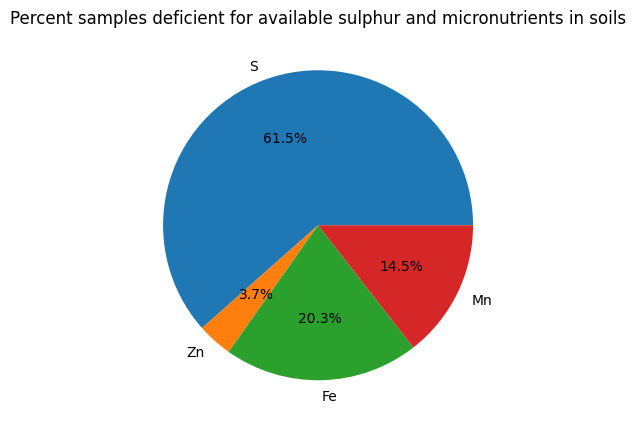

In [23]:
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
cars = cs2.iloc[0:4,1].values.tolist()

data = cs2.iloc[0:4,2].values.tolist()

# Creating plot
fig = plt.figure(figsize =(5, 7))
plt.pie(data, labels = cars,autopct='%1.1f%%')
plt.title('Percent samples deficient for available sulphur and micronutrients in soils')
# show plot
plt.show()

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
labelencoder_Y = LabelEncoder()
df['Y']= labelencoder_Y.fit_transform(df.iloc[:,3].values)
x = df.iloc[:, 9:28].values 
Y = df["Y"].values 
X=[]
for q in x:
    X.append([float(i) for i in q])
#Split the data again, but this time into 75% training and 25% testing data sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

    #Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def models(X_train,Y_train):
    
    #Using Logistic Regression 
      from sklearn.linear_model import LogisticRegression
      log = LogisticRegression(random_state = 0)
      log.fit(X_train, Y_train)

      #Using KNeighborsClassifier 
      from sklearn.neighbors import KNeighborsClassifier
      knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
      knn.fit(X_train, Y_train)

      #Using SVC linear
      from sklearn.svm import SVC
      svc_lin = SVC(kernel = 'linear', random_state = 0)
      svc_lin.fit(X_train, Y_train)

      #Using SVC rbf
      from sklearn.svm import SVC
      svc_rbf = SVC(kernel = 'rbf', random_state = 0)
      svc_rbf.fit(X_train, Y_train)

      #Using GaussianNB 
      from sklearn.naive_bayes import GaussianNB
      gauss = GaussianNB()
      gauss.fit(X_train, Y_train)

      #Using DecisionTreeClassifier 
      from sklearn.tree import DecisionTreeClassifier
      tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
      tree.fit(X_train, Y_train)

      #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
      from sklearn.ensemble import RandomForestClassifier
      forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
      forest.fit(X_train, Y_train)

      #print model accuracy on the training data.
      print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
      print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
      print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
      print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
      print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
      print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
      print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

      return  log, knn, svc_lin, svc_rbf, gauss, tree, forest
model = models(X_train,Y_train)
    #Print Prediction of KNN model
pred_k = model[5].predict(X_test)
print(pred_k)
    

    

[0]Logistic Regression Training Accuracy: 0.7780678851174935
[1]K Nearest Neighbor Training Accuracy: 0.4804177545691906
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9608355091383812
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.46475195822454307
[4]Gaussian Naive Bayes Training Accuracy: 0.8772845953002611
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9895561357702349
[ 24 126  47  45  61  48  66  48 126  83  85  65   3  50  92  93 111  86
  44  18  50 105  14  70  98  99  92  90  44  70  28  28  48  92  48  93
  27  86  66  26  22  75   3  90  22  93  86  26  27  26  90  42  86 102
  50 127  90  70  90  74  90  78  52  96  48  85 111  90 123  90  24  15
  65 102  98  81  51 120  96 126 110  84 106  90  90 126  61  50  24  48
  15  34  88  45  44  83  90  25  90 119  39 115  17  90   8  61  77  14
  66  90 104  70  89  44 126  68  78  68  93  90  22  93  93  48  93 120
  27  14]


In [43]:
alg_model=pd.DataFrame({"Logistic Regression":model[0].predict(X_test),"KNN":model[1].predict(X_test),"SVM(L)":model[2].predict(X_test),"SVM(RBF)":model[3].predict(X_test),"GNB":model[4].predict(X_test),"DT":model[5].predict(X_test),"Random Forest":model[6].predict(X_test)})
a=round(alg_model.mean(),2)
av=a.values.tolist()
ac=list(alg_model.columns)

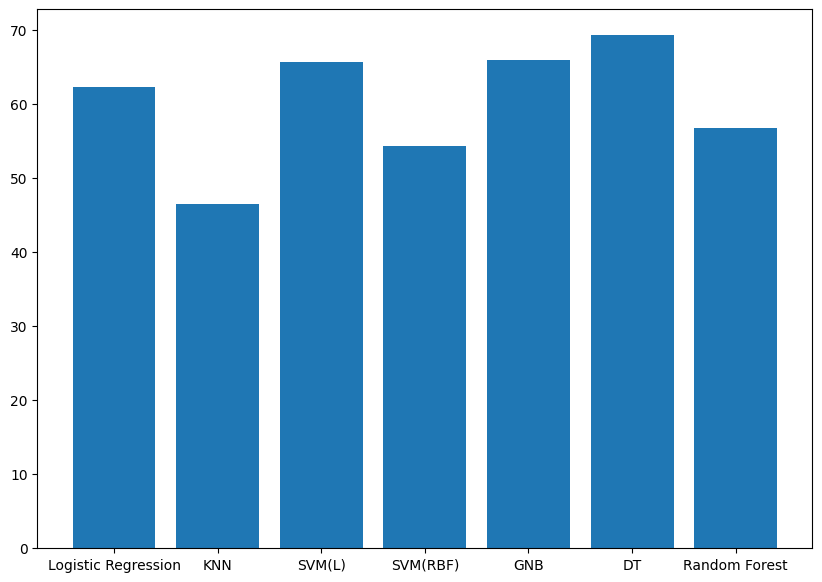

In [44]:
import pandas as pd
from matplotlib import pyplot as plt




# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(ac, av)

# Show Plot
plt.show()


In [26]:
s=set(Y)
v1=df['Village'].values
data_dict=dict(zip(list(s), list(set(v1))))
z=[data_dict[w] for w in list(set(pred_k))]
result=pd.DataFrame({"Village":z,"Soil_Status":"Fertile"})

,Village,Soil_Status
0,Dhakambe,Fertile
1,Makhamalabad,Fertile
2,Oney,Fertile
3,Ujani,Fertile
4,Vinchur & Lasalgaon,Fertile
5,Manur,Fertile
6,Vehalgaon,Fertile
7,Pachore,Fertile
8,Adgaon,Fertile
9,Bhendali,Fertile


In [42]:
df["Status"].unique()

array(['Fertile'], dtype=object)